In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
kils

sample_data/


In [ ]:
from google.colab import files
x = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [ ]:
df_dealers = pd.read_excel('Dataset.xlsx',sheet_name='Dealers')

In [ ]:
df_customers = pd.read_excel('Dataset.xlsx',sheet_name='Customers')

In [ ]:
df_claims = pd.read_excel('Dataset.xlsx',sheet_name='Claims')

In [ ]:
df_parts = pd.read_excel('Dataset.xlsx',sheet_name='Parts')

In [ ]:
df_transactions = pd.read_excel('Dataset.xlsx',sheet_name='Transactions')

In [ ]:
df_vendors = pd.read_excel('Dataset.xlsx',sheet_name='Vendors')

In [ ]:
df_dealers.head()

,Dealer_ID,Dealer_Name,Dealer_Country,State,City,ZIpCode
0,1.0,Kenneth Schmitt,india,Goa,Panji,400001.0
1,2.0,Owen Mclaughlin,india,Delhi,Naoida,400002.0
2,3.0,Donald Repinski,india,Karnataka,Bangalore,400003.0
3,4.0,Rachel Oszust,india,Gujrat,Ahemdabad,400004.0
4,5.0,Lynn Knapp,india,Orrisa,Cuttack,400005.0


In [ ]:
df_customers.head()

,Cust_ID,Cust_Name,Dealer_ID,Country,State,City,ZipCode
0,101.0,pushpak,1.0,ind,goa,panaji,402201.0
1,102.0,raj,3.0,ind,karnataka,banglore,403315.0
2,103.0,ranbir,4.0,ind,gujrat,ahemadabad,326665.0
3,104.0,reyansh,5.0,ind,orrisa,cuttack,543211.0
4,105.0,raunak,2.0,ind,delhi,noida,426232.0


In [ ]:
df_claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1.0,2020-04-01,36000.0,5.0,104.0,901.0,rpr
1,2.0,2020-04-01,42000.0,6.0,106.0,902.0,rplc
2,3.0,2020-04-01,45000.0,4.0,103.0,903.0,rpr
3,4.0,2020-04-01,56000.0,3.0,102.0,904.0,rplc
4,5.0,2020-04-01,39000.0,2.0,105.0,905.0,rpr


In [ ]:
df_parts.head()

,Part_ID,Part_Name,Manufacturer_ID,Manf_Date
0,901.0,brake pad,501.0,1996-08-12
1,902.0,axle,502.0,1997-03-03
2,903.0,tie rod,503.0,1997-06-13
3,904.0,differential,504.0,1997-01-14
4,905.0,rear suspension,505.0,1996-08-19


In [ ]:
df_transactions.head()

,transaction_id,claim_id,transaction_date,transaction_amount
0,101.0,1.0,2020-04-01,36000.0
1,102.0,2.0,2020-04-01,42000.0
2,103.0,3.0,2020-04-01,45000.0
3,104.0,4.0,2020-04-01,56000.0
4,105.0,5.0,2020-04-01,39000.0


In [ ]:
df_vendors.head()

,Vendor_ID,Name,Country,State,City,ZIpCode
0,501.0,Advik,ind,goa,panaji,400001.0
1,502.0,Rudra,ind,delhi,noida,400002.0
2,503.0,Aayansh,ind,karnataka,banglore,400003.0
3,504.0,Adinew,ind,gujrat,ahemadabad,400004.0
4,505.0,Dhruv,ind,orrisa,cuttack,400005.0


In [ ]:
df_claims['Dealer_ID'].value_counts().head(100)

5.0       971
3.0       922
2.0       922
1.0       922
6.0       394
         ... 
1283.0     42
1284.0     42
1285.0     42
1286.0     42
1287.0     42
Name: Dealer_ID, Length: 100, dtype: int64

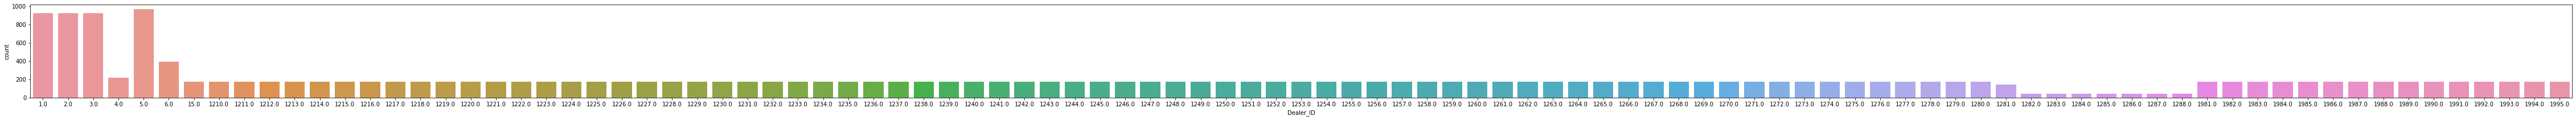

In [ ]:
# usecase-1 Monthly report of top ten Dealers who have claimed with high count
df_claims['Dealer_ID'].value_counts().head(10)
fig, axes = plt.subplots(figsize=(80,3))
sns.countplot(x="Dealer_ID",data=df_claims)

In [ ]:
values = df_claims['Dealer_ID'].value_counts()

In [ ]:
values.items()

In [ ]:
values.iloc

In [ ]:
# usecase-2  Monthly report of top ten parts  which have high failed count
df_claims['Part_ID'].value_counts().head(10)

906    4019
905    3349
901    3349
907    3348
904    2010
903    2010
902    2010
Name: Part_ID, dtype: int64

In [ ]:
# usecase-3 dsample for  replaced or repaired
df_claims['Repair_or_Replace'].value_counts()

rplc    14736
rpr      5359
Name: Repair_or_Replace, dtype: int64

In [ ]:
# usecase-3 final solution - determine whether the defective part is to be replaced or repaired
df_claims[['Repair_or_Replace','Part_ID']].value_counts().head(10)

Repair_or_Replace  Part_ID
rplc               906        3349
                   907        3348
                   904        2010
rpr                901        2009
rplc               905        2009
rpr                905        1340
rplc               903        1340
                   902        1340
                   901        1340
rpr                906         670
dtype: int64

In [ ]:
df_claims.head().head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1,2020-04-01,36000,5,104,901,rpr
1,2,2020-04-01,42000,6,106,902,rplc
2,3,2020-04-01,45000,4,103,903,rpr
3,4,2020-04-01,56000,3,102,904,rplc
4,5,2020-04-01,39000,2,105,905,rpr


In [ ]:
rep_or_repl = pd.get_dummies(df_claims['Repair_or_Replace'],drop_first=True)

In [ ]:
rep_or_repl.head()

,rpr
0,1
1,0
2,1
3,0
4,1


In [ ]:
df_claims.drop(['Repair_or_Replace'],axis=1,inplace=True)

In [ ]:
df_claims = pd.concat([df_claims,rep_or_repl],axis=1)

In [ ]:
df_claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,rpr
0,1,2020-04-01,36000,5,104,901,1
1,2,2020-04-01,42000,6,106,902,0
2,3,2020-04-01,45000,4,103,903,1
3,4,2020-04-01,56000,3,102,904,0
4,5,2020-04-01,39000,2,105,905,1


In [ ]:
df_claims.corr()

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,rpr
claim_id,1.000000,0.000214,0.002988,-0.000791,0.000189,-0.000169
claim_amount,0.000214,1.000000,-0.000154,-0.001481,-0.285543,-0.264751
Dealer_ID,0.002988,-0.000154,1.000000,0.007710,-0.002561,0.000630
Cust_ID,-0.000791,-0.001481,0.007710,1.000000,0.002312,-0.001301
Part_ID,0.000189,-0.285543,-0.002561,0.002312,1.000000,-0.364181
rpr,-0.000169,-0.264751,0.000630,-0.001301,-0.364181,1.000000


In [ ]:
df_claims.columns

Index(['claim_id', 'claim_date', 'claim_amount', 'Dealer_ID', 'Cust_ID',
       'Part_ID', 'rpr'],
      dtype='object')

In [ ]:
df_claims.columns = ['claim_id', 'claim_date', 'claim_amount', 'Dealer_ID', 'Cust_ID',
       'Part_ID', 'Target_column']

In [ ]:
df_claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Target_column
0,1,2020-04-01,36000,5,104,901,1
1,2,2020-04-01,42000,6,106,902,0
2,3,2020-04-01,45000,4,103,903,1
3,4,2020-04-01,56000,3,102,904,0
4,5,2020-04-01,39000,2,105,905,1


In [ ]:
df_claims.corr()

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,Target_column
claim_id,1.000000,0.000214,0.002988,-0.000791,0.000189,-0.000169
claim_amount,0.000214,1.000000,-0.000154,-0.001481,-0.285543,-0.264751
Dealer_ID,0.002988,-0.000154,1.000000,0.007710,-0.002561,0.000630
Cust_ID,-0.000791,-0.001481,0.007710,1.000000,0.002312,-0.001301
Part_ID,0.000189,-0.285543,-0.002561,0.002312,1.000000,-0.364181
Target_column,-0.000169,-0.264751,0.000630,-0.001301,-0.364181,1.000000


In [ ]:
df_claims.drop(['claim_id','Dealer_ID','Cust_ID'],axis=1,inplace=True)

In [ ]:
df_claims.head()

,claim_date,claim_amount,Part_ID,Target_column
0,2020-04-01,36000,901,1
1,2020-04-01,42000,902,0
2,2020-04-01,45000,903,1
3,2020-04-01,56000,904,0
4,2020-04-01,39000,905,1


In [ ]:
df_claims.corr()

,claim_amount,Part_ID,Target_column
claim_amount,1.000000,-0.285543,-0.264751
Part_ID,-0.285543,1.000000,-0.364181
Target_column,-0.264751,-0.364181,1.000000


In [ ]:
df_claims.drop(['claim_date'],axis=1,inplace=True)

In [ ]:
df_claims.head()

,claim_amount,Part_ID,Target_column
0,36000,901,1
1,42000,902,0
2,45000,903,1
3,56000,904,0
4,39000,905,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_claims.drop('Target_column',axis=1), 
                                                    df_claims['Target_column'], test_size=0.30, 
                                                    random_state=60)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
cross_val_score(classifier,df_claims.drop('Target_column',axis=1),df_claims['Target_column'],cv=10,scoring='accuracy').mean()

1.0

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cross_val_score(lr,df_claims.drop('Target_column',axis=1),df_claims['Target_column'],cv=10,scoring='accuracy').mean()

0.7000248880039821

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logmodel.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[4257  196]
 [1576    0]]


In [ ]:
accuracy_score(y_test,y_pred)*100

70.60872449825841